In [1]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import and read csv file
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
# View the shape of the dataset
print('Shape:', df.shape)
print('Missing value count:', df.isnull().any().sum())

Shape: (50000, 2)
Missing value count: 0


In [4]:
# Check info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
df_pos = df[(df['sentiment']=='positive')]
df_neg = df[(df['sentiment']=='negative')]
print('Shape:')
print('Positive sentiments =', df_pos.shape)
print('Negative sentiments =', df_neg.shape)

Shape:
Positive sentiments = (25000, 2)
Negative sentiments = (25000, 2)


In [6]:
# Sampling only 10000 samples to train the model faster
# Create an inbalanced dataset; pos:neg = 9000:1000 rows

df_pos10 = df_pos[:9000]
df_neg10 = df_neg[:1000]

df_rev = pd.concat([df_pos10, df_neg10])

In [7]:
# Confirm shape of imbalanced df
df_rev.shape

(10000, 2)

#### Dealing with imbalanced classes

<AxesSubplot:ylabel='sentiment'>

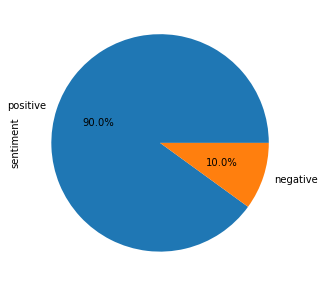

In [8]:
# Visualize value counts of sampled data using pie chart
plt.figure(figsize=[5,5])
df_rev.sentiment.value_counts().plot(kind='pie', autopct='%1.1f%%')

In [9]:
# use RandomUnderSampler from imblearn library to resample the imbalanced data

!pip install -U imbalanced-learn
from imblearn.under_sampling import RandomUnderSampler

# create new instance rus
# random_state set to 0 to control randomization of the algorithm
rus = RandomUnderSampler(random_state=0)

# resample the imbalanced dataset by fitting rus with fit_resample(x,y)
balrev_df, balrev_df['sentiment'] = rus.fit_resample(df_rev[['review']], 
                                                    df_rev[['sentiment']])
balrev_df

,review,sentiment
0,Basically there's a family where a little boy ...,negative
1,"This show was an amazing, fresh & innovative i...",negative
2,Encouraged by the positive comments about this...,negative
3,Phil the Alien is one of those quirky films wh...,negative
4,I saw this movie when I was about 12 when it c...,negative
...,...,...
1995,Knute Rockne led an extraordinary life and his...,positive
1996,At the height of the 'Celebrity Big Brother' r...,positive
1997,This is another of Robert Altman's underrated ...,positive
1998,This movie won a special award at Cannes for i...,positive


In [10]:
# Check the shape of balanced dataset
balrev_df[balrev_df['sentiment']=='positive'].shape

(1000, 2)

<AxesSubplot:ylabel='sentiment'>

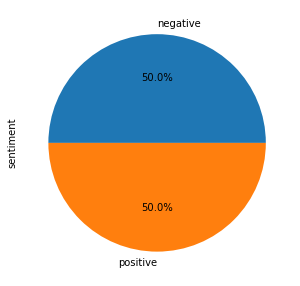

In [11]:
# Visualize value counts of balance dataset using pie chart
plt.figure(figsize=[5,5])
balrev_df.sentiment.value_counts().plot(kind='pie', autopct='%1.1f%%')

In [12]:
# Compare the imbalanced and balanced dataset
print(df_rev.value_counts('sentiment'))
print(balrev_df.value_counts('sentiment'))

sentiment
positive    9000
negative    1000
dtype: int64
sentiment
negative    1000
positive    1000
dtype: int64


C:\Users\bixby\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bixby\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Balanced Sentiment reviews')]

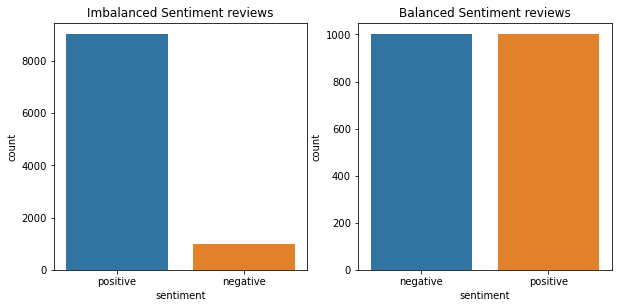

In [13]:
# Cisualize comparison between imbalanced and balanced datasets
plt.figure(figsize=(10,10))
plt.subplot(221)
sns.countplot('sentiment', data=df_rev).set(title='Imbalanced Sentiment reviews')
plt.subplot(222)
sns.countplot('sentiment', data=balrev_df).set(title='Balanced Sentiment reviews')

### Split the data into train and test set

In [14]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(balrev_df, test_size=0.33, random_state=42)

In [15]:
# Set independent(x) and dependent (y) variables within the train set

train_x, train_y = train['review'], train['sentiment']
test_x, test_y = test['review'], test['sentiment']

In [16]:
# Verify the shape of the test and train set set
print(test_x.shape)
print(train_x.shape)

(660,)
(1340,)


### Bags of Words text representation

2 common ways:-
a) CountVectorizer
b) Term Frequency, Inverse Document Frequency (TF-IDF)

In [17]:
# Turning text data into numerical vectors using TF-IDF
# To identify unique/representative words for pos and neg reviews
# Resulting 1340 reviews + 20625 words

from sklearn.feature_extraction.text import TfidfVectorizer

# Create a new instance TfidVectorizer then fit and transform train_X
tfidf = TfidfVectorizer(stop_words='english')
train_x_vec = tfidf.fit_transform(train_x)
train_x_vec

<1340x20625 sparse matrix of type '<class 'numpy.float64'>'
	with 118834 stored elements in Compressed Sparse Row format>

In [18]:
# To view the vectorized text data in dataframe
pd.DataFrame.sparse.from_spmatrix(train_x_vec, index=train_x.index,
                                  columns=tfidf.get_feature_names())

C:\Users\bixby\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,007,01pm,02,04,08,10,100,1000,...,zooming,zooms,zues,zzzzzzzzzzzzzzzzzz,æon,élan,émigré,ísnt,ïn,ünfaithful
81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.042791,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# Transform the test_x using tfidf as well

test_x_vec = tfidf.transform(test_x)

### Classifier Model Selection

#### Support Vector Machine (SVM) 

In [20]:
from sklearn.svm import SVC

model_svc = SVC(kernel='linear')
model_svc.fit(train_x_vec, train_y)

SVC(kernel='linear')

In [21]:
# Generate prediction
print(model_svc.predict(tfidf.transform(['A good movie'])))
print(model_svc.predict(tfidf.transform(['An excellent movie'])))
print(model_svc.predict(tfidf.transform(['I did not like this movie at all'])))

['positive']
['positive']
['negative']


#### Naive Bayes 

In [22]:
# Introduce the input x as numerical and output as sentiment
from sklearn.naive_bayes import GaussianNB

model_gnb = GaussianNB()
model_gnb.fit(train_x_vec.toarray(), train_y)

GaussianNB()

#### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression()
model_LR.fit(train_x_vec, train_y)

LogisticRegression()

In [24]:
# Generate prediction
print(model_LR.predict(tfidf.transform(['A good movie'])))
print(model_LR.predict(tfidf.transform(['An excellent movie'])))
print(model_LR.predict(tfidf.transform(['I did not like this movie at all'])))

['negative']
['positive']
['negative']


#### Decision Tree 

In [25]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(train_x_vec, train_y)

DecisionTreeClassifier()

In [26]:
# Generate prediction
print(model_dt.predict(tfidf.transform(['A good movie'])))
print(model_dt.predict(tfidf.transform(['An excellent movie'])))
print(model_dt.predict(tfidf.transform(['I did not like this movie at all'])))

['positive']
['positive']
['positive']


### Model Evaluation

In [27]:
# Model.score('Test samples', 'True labels')

print('SVM score:', format(model_svc.score(test_x_vec, test_y), '.2f'))
print('Naive Bayes score:', format(model_gnb.score(test_x_vec.toarray(), test_y),'.2f'))
print('Logistic Regression score:', format( model_LR.score(test_x_vec, test_y), '.2f'))
print('Decision Tree score:', format(model_dt.score(test_x_vec, test_y), '.2f'))

SVM score: 0.84
Naive Bayes score: 0.63
Logistic Regression score: 0.83
Decision Tree score: 0.66


In [28]:
# SVM showed better prediction scoring than the other models
# F1 score of SVM model

from sklearn.metrics import f1_score

f1_score(test_y, model_svc.predict(test_x_vec),
        labels=['positive', 'negative'],
        average = None)

array([0.84671533, 0.83464567])

In [29]:
# Print classification report for SVM model

from sklearn.metrics import classification_report

print(classification_report(test_y, model_svc.predict(test_x_vec),
                           labels=['positive', 'negative']))

              precision    recall  f1-score   support

    positive       0.83      0.87      0.85       335
    negative       0.85      0.82      0.83       325

    accuracy                           0.84       660
   macro avg       0.84      0.84      0.84       660
weighted avg       0.84      0.84      0.84       660



In [30]:
# Confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y, model_svc.predict(test_x_vec),
                     labels=['positive', 'negative'])
cm

array([[290,  45],
       [ 60, 265]], dtype=int64)

<AxesSubplot:>

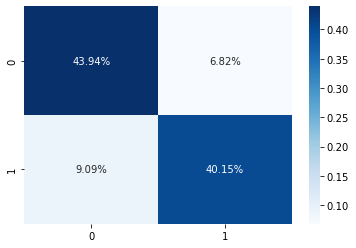

In [31]:
# Plot confusion matrix
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

### Tuning the Model

#### GridSearchCV

In [32]:
from sklearn.model_selection import GridSearchCV

# set the parameters
parameters = {'C': [1,4,8,16,32], 'kernel':['linear', 'rbf']}
svc = SVC()
svc_grid = GridSearchCV(svc, parameters, cv=5)

svc_grid.fit(train_x_vec, train_y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 4, 8, 16, 32], 'kernel': ['linear', 'rbf']})

In [33]:
print(svc_grid.best_params_)
print(svc_grid.best_estimator_)

{'C': 1, 'kernel': 'linear'}
SVC(C=1, kernel='linear')
